In [269]:
import session_info
session_info.show()

In [2]:
import pandas as pd 
import numpy as np
import matplotlib as plt
import os

In [10]:
pwd

'/home/albrijawi/Downloads'

In [18]:
ls

GSE191055_fpkm_genename.txt         pyrx-0.9.2-linux-x86_64/
GSE211800_BORIS_negDox_1_peaks.xls


In [32]:
!pip install scanpy

     |████████████████████████████████| 2.0 MB 1.4 MB/s eta 0:00:01     |██████████████▊                 | 931 kB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 102 kB 61.4 MB/s eta 0:00:01
     |████████████████████████████████| 88 kB 10.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 60.4 MB/s eta 0:00:01
     |████████████████████████████████| 75 kB 8.0 MB/s  eta 0:00:01
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82830 sha256=d67c1664fb210387681189fd739f2ed8e3b8149d4b3c3dbf771e165f7793bb3d
  Stored in directory: /home/albrijawi/.cache/pip/wheels/f4/3e/1c/596d0a463d17475af648688443fa4846fef624d1390339e7e9
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55639 sha256=8e5136a9fedc79f3c815154df94042d0a67a0abe6c5d3fd3f21983f62fb47619
  Stored in directory: /home/albrijawi/.cache/pip/wheels/12/f9/4d/ec5ad1c823c710fcc4473669fdcffc8891f4bc398c841af22e
  Created wheel for session-info: file

In [34]:
!pip install anndata

In [35]:
import scanpy as sc

In [36]:
import os 
import sys

In [37]:
import seaborn as sn

In [38]:
import anndata 

# New Start!

In [88]:
pwd

'/home/albrijawi/Downloads'

In [89]:
cd ..

/home/albrijawi


In [90]:
cd Desktop

/home/albrijawi/Desktop


In [91]:
ls

 file_format/
'Old Firefox Data'/
 Parent_Visium_Human_Glioblastoma_analysis.tar.gz
 Parent_Visium_Human_Glioblastoma_cloupe.cloupe
 Parent_Visium_Human_Glioblastoma_filtered_feature_bc_matrix.h5
 Parent_Visium_Human_Glioblastoma_filtered_feature_bc_matrix.tar
 Parent_Visium_Human_Glioblastoma_image.tif
 Parent_Visium_Human_Glioblastoma_metrics_summary.csv
 Parent_Visium_Human_Glioblastoma_molecule_info.h5
 Parent_Visium_Human_Glioblastoma_raw_feature_bc_matrix.h5
 Parent_Visium_Human_Glioblastoma_raw_feature_bc_matrix.tar.gz
 Parent_Visium_Human_Glioblastoma_spatial.tar.gz
 Parent_Visium_Human_Glioblastoma_web_summary.html
 StartUp/


In [92]:
pwd

'/home/albrijawi/Desktop'

# Dataset's Info

In [270]:
#tutorial_sample was the dir created by cellranger based on our flag: --id tutorial_sample
path = 'Parent_Visium_Human_Glioblastoma_filtered_feature_bc_matrix.h5'
adata = sc.read_10x_h5(path)  

/home/albrijawi/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [271]:
adata

AnnData object with n_obs × n_vars = 3468 × 36601
    var: 'gene_ids', 'feature_types', 'genome'

## Preprocessing

### Filtering

In [272]:
# get rid of cells with fewer than 200 genes
sc.pp.filter_cells(adata, min_genes = 200)
# get rid of genes that are found in fewer than 3 cells
sc.pp.filter_genes(adata, min_cells= 3)

In [273]:
adata.var

,gene_ids,feature_types,genome,n_cells
AL627309.1,ENSG00000238009,Gene Expression,GRCh38,22
AL627309.5,ENSG00000241860,Gene Expression,GRCh38,37
AP006222.2,ENSG00000286448,Gene Expression,GRCh38,4
LINC01409,ENSG00000237491,Gene Expression,GRCh38,192
FAM87B,ENSG00000177757,Gene Expression,GRCh38,14
...,...,...,...,...
AL354822.1,ENSG00000278384,Gene Expression,GRCh38,40
AL592183.1,ENSG00000273748,Gene Expression,GRCh38,117
AC240274.1,ENSG00000271254,Gene Expression,GRCh38,25
AC007325.4,ENSG00000278817,Gene Expression,GRCh38,430


In [274]:
adata.obs

,n_genes
AAACAAGTATCTCCCA-1,6031
AAACAATCTACTAGCA-1,2334
AAACACCAATAACTGC-1,3543
AAACAGAGCGACTCCT-1,3147
AAACAGTGTTCCTGGG-1,6331
...,...
TTGTTGTGTGTCAAGA-1,4475
TTGTTTCACATCCAGG-1,4478
TTGTTTCATTAGTCTA-1,3698
TTGTTTCCATACAACT-1,3925


## Lebeling MT genes

In [276]:
# lebel the group of mitochondrial genes as 'mt'
adata.var['mt'] = adata.var_names.str.startswith('MT-')  

In [277]:
adata

AnnData object with n_obs × n_vars = 3464 × 22183
    obs: 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt'

In [278]:
adata.var.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22183 entries, AL627309.1 to AC007325.2
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gene_ids       22183 non-null  object
 1   feature_types  22183 non-null  object
 2   genome         22183 non-null  object
 3   n_cells        22183 non-null  int64 
 4   mt             22183 non-null  bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 1.4+ MB


In [279]:
adata.var[adata.var.mt == True]

,gene_ids,feature_types,genome,n_cells,mt
MT-ND1,ENSG00000198888,Gene Expression,GRCh38,3464,True
MT-ND2,ENSG00000198763,Gene Expression,GRCh38,3456,True
MT-CO1,ENSG00000198804,Gene Expression,GRCh38,3464,True
MT-CO2,ENSG00000198712,Gene Expression,GRCh38,3464,True
MT-ATP8,ENSG00000228253,Gene Expression,GRCh38,1733,True
MT-ATP6,ENSG00000198899,Gene Expression,GRCh38,3464,True
MT-CO3,ENSG00000198938,Gene Expression,GRCh38,3464,True
MT-ND3,ENSG00000198840,Gene Expression,GRCh38,3464,True
MT-ND4L,ENSG00000212907,Gene Expression,GRCh38,2558,True
MT-ND4,ENSG00000198886,Gene Expression,GRCh38,3464,True


In [280]:
adata.obs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3464 entries, AAACAAGTATCTCCCA-1 to TTGTTTGTATTACACG-1
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   n_genes  3464 non-null   int64
dtypes: int64(1)
memory usage: 183.2+ KB


In [281]:
adata.obs.describe()

,n_genes
count,3464.000000
mean,4296.673210
std,1538.870733
min,276.000000
25%,3161.000000
50%,4329.500000
75%,5424.250000
max,8844.000000


In [282]:
adata.obs_names

Index(['AAACAAGTATCTCCCA-1', 'AAACAATCTACTAGCA-1', 'AAACACCAATAACTGC-1',
       'AAACAGAGCGACTCCT-1', 'AAACAGTGTTCCTGGG-1', 'AAACATTTCCCGGATT-1',
       'AAACCGGGTAGGTACC-1', 'AAACCGTTCGTCCAGG-1', 'AAACCTAAGCAGCCGG-1',
       'AAACCTCATGAAGTTG-1',
       ...
       'TTGTGGTGGTACTAAG-1', 'TTGTGTATGCCACCAA-1', 'TTGTGTTTCCCGAAAG-1',
       'TTGTTAGCAAATTCGA-1', 'TTGTTCAGTGTGCTAC-1', 'TTGTTGTGTGTCAAGA-1',
       'TTGTTTCACATCCAGG-1', 'TTGTTTCATTAGTCTA-1', 'TTGTTTCCATACAACT-1',
       'TTGTTTGTATTACACG-1'],
      dtype='object', length=3464)

## Calculate QC

In [283]:
# calcualte the QC metrics
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [284]:
# make the names of var unique (to avoid duplicating)
adata.var_names_make_unique()

# High expressed genes

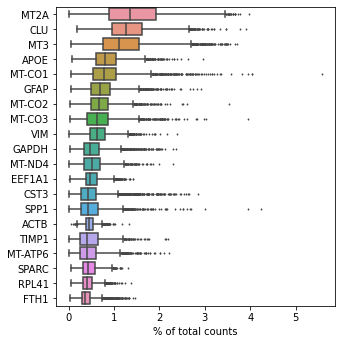

In [285]:
# Display top 20 the highest expressed genes 
sc.pl.highest_expr_genes(adata, n_top=20)

In an AnnData object, adata.X represents the attribute that stores the main data matrix, typically referred to as the "X" matrix. It contains the gene expression data, where each row corresponds to a cell (observation) and each column corresponds to a gene (variable). It is a sparse matrix representation of the gene expression data to efficiently handle large-scale single-cell RNA sequencing (scRNA-seq) datasets, where the majority of entries are zero.

## This gives you the expressed genes in the cell has index 0

In [286]:
# If you want to expalore a certin cell in the dataset

cell_index = 0  # Index of the cell you want to examine

# Access the expression data for the specific cell
gene_expression = adata.X[cell_index]

# Get the indices of the genes with non-zero expression in the cell
expressed_gene_indices = gene_expression.nonzero()[1]

# Access the gene names from the 'var_names' attribute
expressed_genes = adata.var_names[expressed_gene_indices]

# Print the list of expressed genes in the cell
print(expressed_genes)

Index(['ISG15', 'SDF4', 'B3GALT6', 'ACAP3', 'INTS11', 'DVL1', 'MXRA8', 'CCNL2',
       'MRPL20', 'VWA1',
       ...
       'MT-ATP8', 'MT-ATP6', 'MT-CO3', 'MT-ND3', 'MT-ND4L', 'MT-ND4', 'MT-ND5',
       'MT-ND6', 'MT-CYB', 'AC011043.1'],
      dtype='object', length=6028)


# Check if a gene existed in the dataset

In [287]:
gene_names = adata.var_names

In [288]:
gene_names[:3]

Index(['AL627309.1', 'AL627309.5', 'AP006222.2'], dtype='object')

In [289]:
'FAM41C' in gene_names

True

# Display the tissue with the expressed genes in cells

In [ ]:
with mpl.rc_context({'figure.figsize': [6,7], 'axes.facecolor': 'black'}):
    sc.pl.spatial(adata, color=['AL627309.1', 'AL627309.5', 'AP006222.2'], img_key=None, size=1,
                  spot_size=10,  # Adjust the spot size as needed
                  vmin=0, cmap='magma', vmax='p99.0',
                  gene_symbols='SYMBOL')


In [290]:
adata.var.shape, adata.obs.shape

((22183, 9), (3464, 5))

In [291]:
adata.var

,gene_ids,feature_types,genome,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
AL627309.1,ENSG00000238009,Gene Expression,GRCh38,22,False,22,0.006351,99.364896,22.0
AL627309.5,ENSG00000241860,Gene Expression,GRCh38,37,False,37,0.011259,98.931871,39.0
AP006222.2,ENSG00000286448,Gene Expression,GRCh38,4,False,4,0.001155,99.884527,4.0
LINC01409,ENSG00000237491,Gene Expression,GRCh38,192,False,192,0.060335,94.457275,209.0
FAM87B,ENSG00000177757,Gene Expression,GRCh38,14,False,14,0.004042,99.595843,14.0
...,...,...,...,...,...,...,...,...,...
AL354822.1,ENSG00000278384,Gene Expression,GRCh38,40,False,40,0.012125,98.845266,42.0
AL592183.1,ENSG00000273748,Gene Expression,GRCh38,117,False,117,0.034353,96.622402,119.0
AC240274.1,ENSG00000271254,Gene Expression,GRCh38,25,False,25,0.007217,99.278291,25.0
AC007325.4,ENSG00000278817,Gene Expression,GRCh38,430,False,430,0.138857,87.586605,481.0


In [302]:
adata.shape

(3464, 22183)

In [ ]:
# Don't run this!!
# Drop a column from the var columns
# adata.var.drop('MT', axis=1, inplace=True)

In [293]:
Mita_data = adata.var[adata.var.mt == True]
Mita_data

,gene_ids,feature_types,genome,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
MT-ND1,ENSG00000198888,Gene Expression,GRCh38,3464,True,3464,35.709873,0.000000,123699.0
MT-ND2,ENSG00000198763,Gene Expression,GRCh38,3456,True,3456,19.692263,0.230947,68214.0
MT-CO1,ENSG00000198804,Gene Expression,GRCh38,3464,True,3464,100.439087,0.000000,347921.0
MT-CO2,ENSG00000198712,Gene Expression,GRCh38,3464,True,3464,84.559181,0.000000,292913.0
MT-ATP8,ENSG00000228253,Gene Expression,GRCh38,1733,True,1733,0.778868,49.971132,2698.0
MT-ATP6,ENSG00000198899,Gene Expression,GRCh38,3464,True,3464,51.045612,0.000000,176822.0
MT-CO3,ENSG00000198938,Gene Expression,GRCh38,3464,True,3464,77.672058,0.000000,269056.0
MT-ND3,ENSG00000198840,Gene Expression,GRCh38,3464,True,3464,44.250866,0.000000,153285.0
MT-ND4L,ENSG00000212907,Gene Expression,GRCh38,2558,True,2558,1.766744,26.154734,6120.0
MT-ND4,ENSG00000198886,Gene Expression,GRCh38,3464,True,3464,59.940819,0.000000,207635.0


In [294]:
# Display the genes of MT- 
adata.var[adata.var.index.str.startswith('MT-')]

,gene_ids,feature_types,genome,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
MT-ND1,ENSG00000198888,Gene Expression,GRCh38,3464,True,3464,35.709873,0.000000,123699.0
MT-ND2,ENSG00000198763,Gene Expression,GRCh38,3456,True,3456,19.692263,0.230947,68214.0
MT-CO1,ENSG00000198804,Gene Expression,GRCh38,3464,True,3464,100.439087,0.000000,347921.0
MT-CO2,ENSG00000198712,Gene Expression,GRCh38,3464,True,3464,84.559181,0.000000,292913.0
MT-ATP8,ENSG00000228253,Gene Expression,GRCh38,1733,True,1733,0.778868,49.971132,2698.0
MT-ATP6,ENSG00000198899,Gene Expression,GRCh38,3464,True,3464,51.045612,0.000000,176822.0
MT-CO3,ENSG00000198938,Gene Expression,GRCh38,3464,True,3464,77.672058,0.000000,269056.0
MT-ND3,ENSG00000198840,Gene Expression,GRCh38,3464,True,3464,44.250866,0.000000,153285.0
MT-ND4L,ENSG00000212907,Gene Expression,GRCh38,2558,True,2558,1.766744,26.154734,6120.0
MT-ND4,ENSG00000198886,Gene Expression,GRCh38,3464,True,3464,59.940819,0.000000,207635.0


In [303]:
adata.obs.sort_values('total_counts', ascending=False)

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
CGCGCCCGACTTAATA-1,8844,8839,50080.0,1095.0,2.186502
TGCCACCTGGCGAAAC-1,8652,8649,48401.0,1242.0,2.566063
CAATAAACCTTGGCCC-1,8596,8592,46482.0,753.0,1.619982
CCTATCTATATCGGAA-1,8519,8515,44235.0,973.0,2.199616
ATGGATCCGGCGTCCG-1,8330,8326,43853.0,1038.0,2.366999
...,...,...,...,...,...
TCGTGTACTATGGATG-1,818,818,1113.0,80.0,7.187781
TCATCACTCGAGCTCG-1,752,752,1039.0,49.0,4.716073
AGAAGAGCGCCGTTCC-1,486,486,660.0,46.0,6.969697
TCGCGTAGCAGTGTCC-1,297,297,349.0,25.0,7.163323


In [304]:
adata.obs.shape

(3464, 5)

In [305]:
sc.pp.normalize_total(adata, inplace=True)

In [306]:
adata.shape

(3464, 22183)

# Identify highly variable genes

In [208]:
!pip install seurat

     |████████████████████████████████| 61.8 MB 39.7 MB/s eta 0:00:01    |█████▋                          | 10.8 MB 1.3 MB/s eta 0:00:39
     |████████████████████████████████| 33.9 MB 46 kB/s s eta 0:00:01
     |████████████████████████████████| 67.9 MB 43.8 MB/s eta 0:00:01     |████████████████████            | 42.3 MB 48.7 MB/s eta 0:00:01     |███████████████████████████▉    | 59.0 MB 43.8 MB/s eta 0:00:01


In [322]:
import seurat
import scanpy as sc
import matplotlib.pyplot as plt

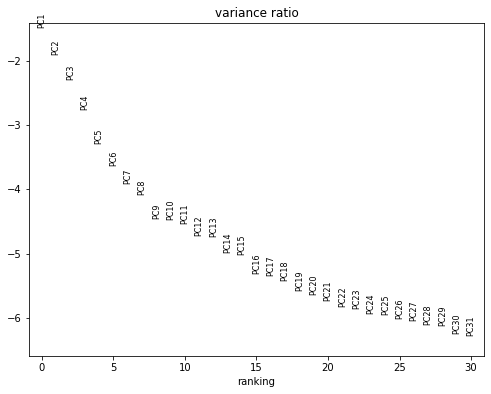

In [324]:
# Modify the figure size
plt.rcParams['figure.figsize'] = (8, 6)  # Adjust the width and height as needed

# Generate the PCA variance ratio plot
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True)

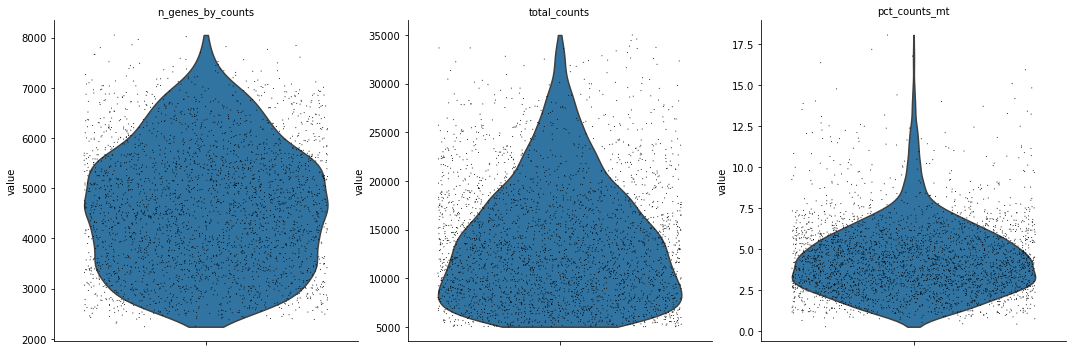

In [ ]:
sc.pp.filter_cells(adata, min_counts=5000)
sc.pp.filter_cells(adata, max_counts=35000)
adata = adata[adata.obs["pct_counts_mt"] < 20]  
# adata = adata[adata.obs["pct_counts_ribo"] < 2]



sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], 
             jitter=0.4, multi_panel=True)

     



Let us also remove genes that are expressed in fewer cells than the specified min_cells value. Here, genes expressed in fewer than 10 cells will be filtered out.


In [185]:
sc.pp.filter_genes(adata, min_cells=10) #Filter genes based on minimum number of cells. 

/home/albrijawi/anaconda3/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


In [186]:
adata.var

,gene_ids,feature_types,genome,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,log1p_mean_counts,log1p_total_counts
AL627309.1,ENSG00000238009,Gene Expression,GRCh38,18,False,22,0.006351,99.364896,22.0,0.006331,3.135494
AL627309.5,ENSG00000241860,Gene Expression,GRCh38,35,False,37,0.011259,98.931871,39.0,0.011196,3.688879
LINC01409,ENSG00000237491,Gene Expression,GRCh38,184,False,192,0.060335,94.457275,209.0,0.058585,5.347107
FAM87B,ENSG00000177757,Gene Expression,GRCh38,13,False,14,0.004042,99.595843,14.0,0.004033,2.708050
LINC01128,ENSG00000228794,Gene Expression,GRCh38,465,False,495,0.161085,85.710162,558.0,0.149355,6.326149
...,...,...,...,...,...,...,...,...,...,...,...
AL354822.1,ENSG00000278384,Gene Expression,GRCh38,36,False,40,0.012125,98.845266,42.0,0.012052,3.761200
AL592183.1,ENSG00000273748,Gene Expression,GRCh38,109,False,117,0.034353,96.622402,119.0,0.033776,4.787492
AC240274.1,ENSG00000271254,Gene Expression,GRCh38,22,False,25,0.007217,99.278291,25.0,0.007191,3.258096
AC007325.4,ENSG00000278817,Gene Expression,GRCh38,413,False,430,0.138857,87.586605,481.0,0.130025,6.177944


# Clustering 

In [245]:


#need to install these too
!conda install -y -c anaconda cmake 
!pip install leidenalg
!pip install louvain



Solving environment: - 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::bokeh==2.4.1=py39h06a4308_0
  - defaults/noarch::black==19.10b0=py_0
  - defaults/noarch::python-lsp-black==1.0.0=pyhd3eb1b0_0
  - defaults/linux-64::anaconda==2021.11=py39_0
  - defaults/linux-64::spyder==5.1.5=py39h06a4308_1
  - defaults/noarch::dask==2021.10.0=pyhd3eb1b0_0
failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda


Solving environment: | 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::bokeh==2.4.1=py39h06a4308_0
  - defaults/noarch::black==19.10b0=py_0
  - defaults/noarch::python-lsp

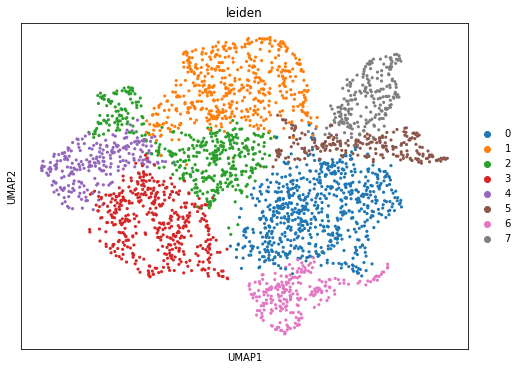

In [247]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=20)
sc.tl.leiden(adata, resolution = 0.25)
sc.pl.umap(adata, color = ['leiden'])

# Find markers

In [252]:
adata.var[:3]

,gene_ids,feature_types,genome,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,log1p_mean_counts,log1p_total_counts
AL627309.1,ENSG00000238009,Gene Expression,GRCh38,18,False,22,0.006351,99.364896,22.0,0.006331,3.135494
AL627309.5,ENSG00000241860,Gene Expression,GRCh38,35,False,37,0.011259,98.931871,39.0,0.011196,3.688879
LINC01409,ENSG00000237491,Gene Expression,GRCh38,184,False,192,0.060335,94.457275,209.0,0.058585,5.347107


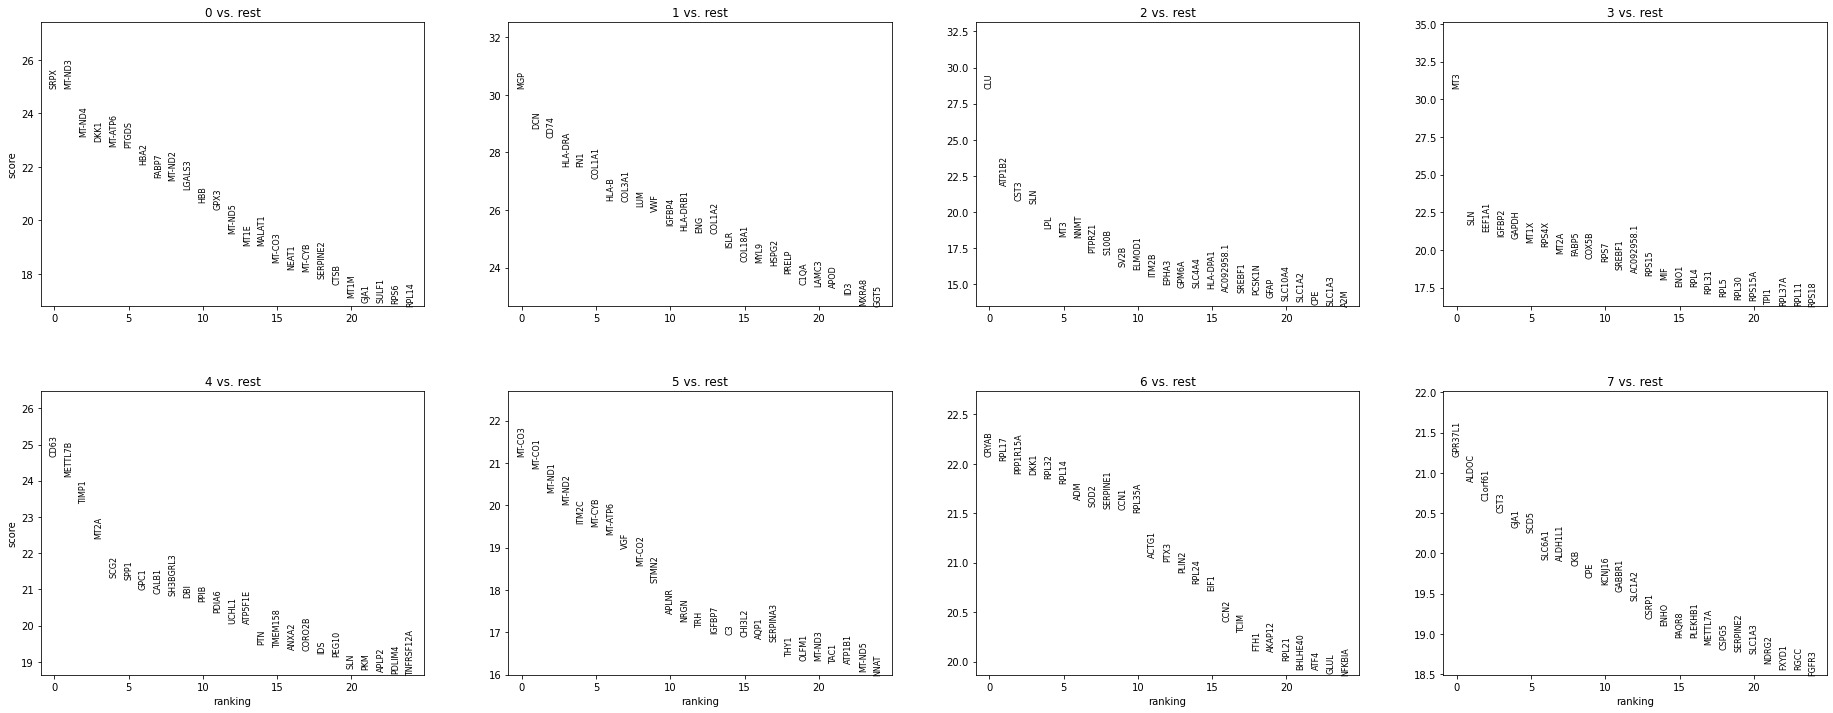

In [248]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

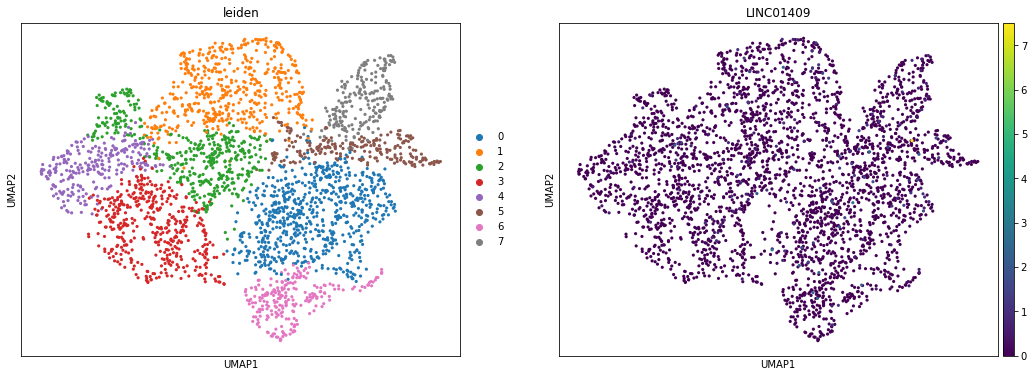

In [253]:
sc.pl.umap(adata, color=['leiden', 'LINC01409'])

In [263]:
# Create a column to understand a certain gene expression in each cell included

adata.obs["LINC01409"] = adata.X[:, adata.var_names == "LINC01409"].A.flatten()

# Display where this gene's expression values are geretere than zero
adata.obs[adata.obs.LINC01409 > 0 ]


,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,log1p_n_genes_by_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,n_counts,leiden,LINC01409
AAAGGTAAGCTGTACC-1,5788,5787,16263.0,798.0,4.906844,8.663542,9.696710,19.891779,25.487302,33.155014,45.877144,16263.0,0,0.785530
AAAGTTGACTCCCGTA-1,3633,3632,8567.0,419.0,4.890860,8.197814,9.055790,22.154780,29.695343,38.449866,52.317030,8567.0,0,1.490544
AAATTAACGGGTAGCT-1,6582,6579,22960.0,1047.0,4.560104,8.791790,10.041553,20.492160,26.755226,34.764808,47.652439,22960.0,1,1.669238
AAATTACACGACTCTG-1,6084,6084,19329.0,767.0,3.968131,8.713582,9.869413,20.125200,26.385224,34.450825,47.731388,19329.0,0,0.660835
AACACGAGACGCGGCC-1,3761,3760,9805.0,546.0,5.568587,8.232440,9.190750,24.201938,31.249363,40.265171,54.298827,9805.0,4,1.302591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGACTATTGTCCGGC-1,5885,5884,16761.0,614.0,3.663266,8.680162,9.726870,18.125410,24.419784,32.402601,45.438816,16761.0,7,0.761996
TTGCTCCCATACCGGA-1,6817,6816,23148.0,484.0,2.090893,8.827175,10.049706,17.651633,24.602557,33.160532,46.086055,23148.0,6,0.551772
TTGCTGGCCGGGCTTC-1,6535,6534,22711.0,757.0,3.333187,8.784928,10.030649,19.558804,26.484963,35.084320,48.522742,22711.0,1,0.562294
TTGGACCTATAACAGT-1,5145,5142,13686.0,255.0,1.863218,8.545392,9.524201,19.077890,25.317843,33.603683,46.880023,13686.0,7,0.933265


In [264]:
adata.var.head(3)

,gene_ids,feature_types,genome,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,log1p_mean_counts,log1p_total_counts
AL627309.1,ENSG00000238009,Gene Expression,GRCh38,18,False,22,0.006351,99.364896,22.0,0.006331,3.135494
AL627309.5,ENSG00000241860,Gene Expression,GRCh38,35,False,37,0.011259,98.931871,39.0,0.011196,3.688879
LINC01409,ENSG00000237491,Gene Expression,GRCh38,184,False,192,0.060335,94.457275,209.0,0.058585,5.347107


In [ ]:
sc.pl.violin(adata, [ 'LINC01409'], groupby='leiden')

In [254]:
adata.var.head(3)

,gene_ids,feature_types,genome,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,log1p_mean_counts,log1p_total_counts
AL627309.1,ENSG00000238009,Gene Expression,GRCh38,18,False,22,0.006351,99.364896,22.0,0.006331,3.135494
AL627309.5,ENSG00000241860,Gene Expression,GRCh38,35,False,37,0.011259,98.931871,39.0,0.011196,3.688879
LINC01409,ENSG00000237491,Gene Expression,GRCh38,184,False,192,0.060335,94.457275,209.0,0.058585,5.347107


In [255]:
adata.obs.head(3)

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,log1p_n_genes_by_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,n_counts,leiden
AAACAAGTATCTCCCA-1,6031,6028,17296.0,625.0,3.613553,8.704336,9.758288,17.657262,23.433164,30.868409,43.859852,17296.0,7
AAACACCAATAACTGC-1,3543,3541,9509.0,260.0,2.734252,8.172447,9.160099,25.007887,33.820591,43.516668,57.229993,9509.0,3
AAACAGAGCGACTCCT-1,3147,3147,6774.0,388.0,5.727783,8.054523,8.820994,21.833481,29.465604,38.544435,53.277236,6774.0,0


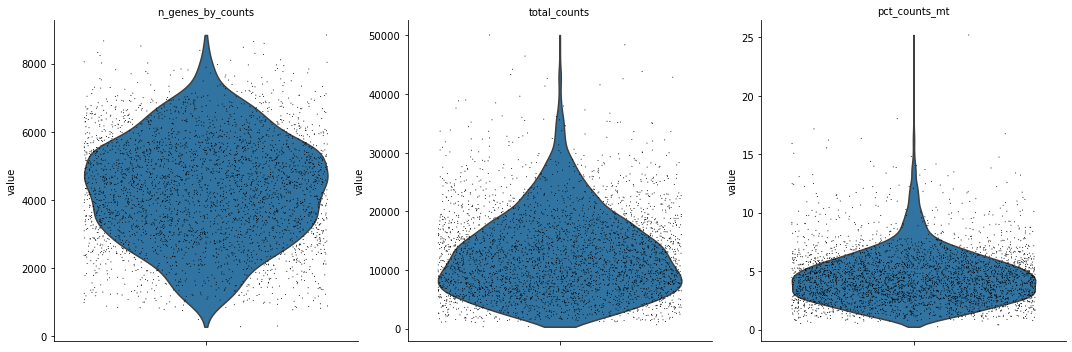

In [111]:
# Display in violin
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

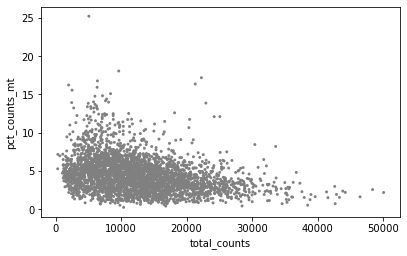

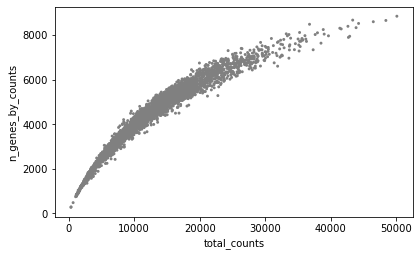

In [112]:
# Scatter visualization 
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

# Network graph analysis

In [330]:
!pip install networkx

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you have an AnnData object named 'adata' with genes and cells data

# Create a new NetworkX graph
G = nx.Graph()

# Add genes as nodes
genes = adata.var_names
G.add_nodes_from(genes)

# Add cells as nodes
cells = adata.obs_names
G.add_nodes_from(cells)

# Get gene expression values for each cell
gene_expression = adata.X.T  # Assuming gene expression values are stored in the data matrix

# Set node sizes based on gene expression values
node_sizes = {gene: gene_expression[i].sum() for i, gene in enumerate(genes)}

# Add edges between genes and cells based on gene expression
for i, gene in enumerate(genes):
    for j, cell in enumerate(cells):
        if gene_expression[i, j] > 0:
            G.add_edge(gene, cell, weight=gene_expression[i, j])

# Set node sizes based on gene expression values
node_sizes = [node_sizes[node] for node in G.nodes]

# Plot the network graph
plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_size=node_sizes)
plt.show()


In [ ]:
import scanpy as sc
import matplotlib.pyplot as plt

# Assuming you already have an AnnData object named 'adata'

# Identify the most expressed genes
top_genes = adata.var['gene_name'].values[:10]  # Select the top 10 most expressed genes

# Extract the expression levels of the top genes
expression = adata[:, top_genes].X.mean(axis=0)  # Mean expression across cells for each gene

# Plot the bubble chart
plt.scatter(top_genes, [1] * len(top_genes), s=expression, alpha=0.7)

# Label the bubbles with gene names
for i, gene in enumerate(top_genes):
    plt.text(gene, 1, gene, ha='center', va='bottom')

# Set labels and title
plt.xlabel('Genes')
plt.ylabel('Expression')
plt.title('Bubble Chart of Most Expressed Genes')

# Show the plot
plt.show()
